# Notebook imports and packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff

from math import log

%matplotlib inline

ModuleNotFoundError: No module named 'sympy'

# Example 1 - A simple cost function

$f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)

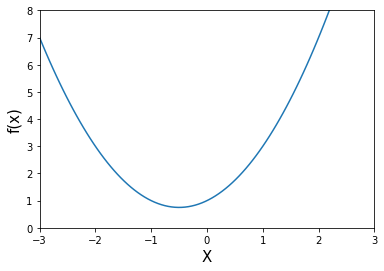

In [4]:
# Plot 
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('X', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.plot(x_1, f(x_1))
plt.show()

# Slope and Derivative

In [5]:
def df(x):
    return 2*x + 1

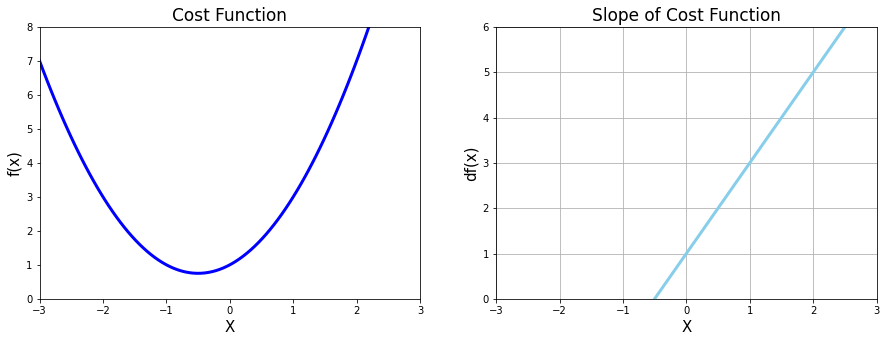

In [6]:
# Plot fucnction and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1, Funtion

plt.subplot(1, 2 , 1)
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2, Derivative

plt.subplot(1, 2, 2)
plt.xlim([-3, 3])
plt.ylim([0, 6])

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('df(x)', fontsize=15)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)


plt.show()

# Gradient Descent Algorithm

In [7]:
x_new = 3
x_previous = 0
learning_rate = 0.1
precision = 0.00001
x_list = [x_new]
slope_list = [df(x_new)]

for n in range(500):
    x_previous = x_new
    slope = df(x_previous)
    x_new = x_previous - learning_rate * slope
    step_size = abs(x_new - x_previous)
    x_list.append(x_new)
    slope_list.append(slope)
    if step_size<precision:
        print(n)
        break
        
        
print('Local Minimum occurs at point :', x_new)
print('Slope at Local Minimum :', slope)
print('Loss :', f(x_new))


50
Local Minimum occurs at point : -0.49996003706460423
Slope at Local Minimum : 9.990733848941336e-05
Loss : 0.7500000015970362


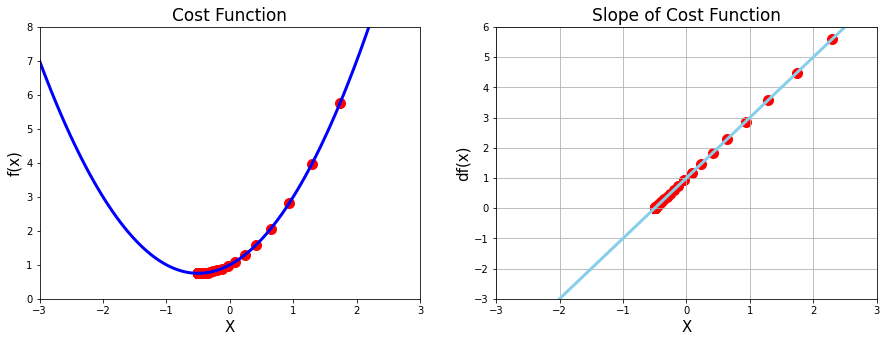

In [8]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1, Funtion

plt.subplot(1, 2 , 1)
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

values = np.array(x_list)
plt.scatter(values, f(values), color='red', s=100)

# Chart 2, Derivative

plt.subplot(1, 2, 2)
plt.xlim([-3, 3])
plt.ylim([-3, 6])

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('df(x)', fontsize=15)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)

plt.scatter(values, df(values), color='red', s=100)



plt.show()


## Example 2 - Multiple Minima vs Initial guess and Advanced Function

###  $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
x_2 = np.linspace(-2, 2, 1000)

In [10]:
def g(x):
    return x**4 - 4*x**2 + 5

In [11]:
def dg(x):
    return 4*x**3 - 8*x 

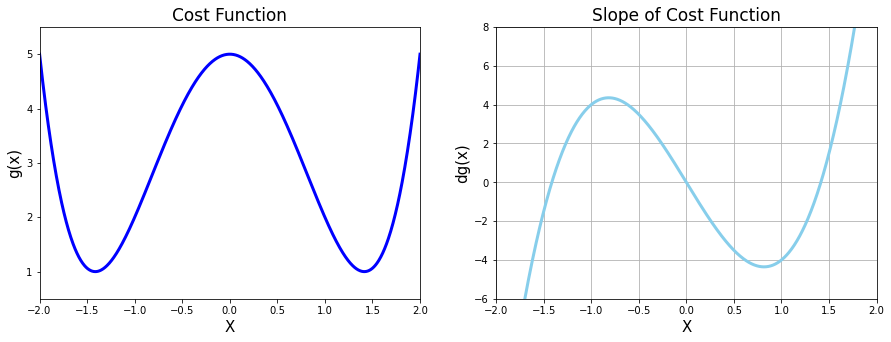

In [12]:
# Plot fucnction and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1, Funtion

plt.subplot(1, 2 , 1)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('g(x)', fontsize=15)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# Chart 2, Derivative

plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)


plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_function(derivative_func, initial_guess, learningRate=0.02, precision=0.001, max_iterations=300):

    x_new = initial_guess
    x_list = [x_new]
    slope_list = [derivative_func(x_new)]

    for n in range(max_iterations):

        x_previous = x_new
        slope = derivative_func(x_previous)

        x_new = x_previous - learningRate * slope
        step_size = abs(x_new - x_previous)

        x_list.append(x_new)
        slope_list.append(derivative_func(x_new))
        if step_size<precision:
            break
    return x_new, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_function(dg, 0.5)
print('Local Minimum occurs at :', local_min)
print('Number of steps :', len(list_x))

Local Minimum occurs at : 1.4122375085019094
Number of steps : 23


In [15]:
local_min, list_x, deriv_list = gradient_function(derivative_func=dg, initial_guess=0.5, learningRate=0.02, precision=0.001)
print('Local Minimum occurs at :', local_min)
print('Number of steps :', len(list_x))

Local Minimum occurs at : 1.4122375085019094
Number of steps : 23


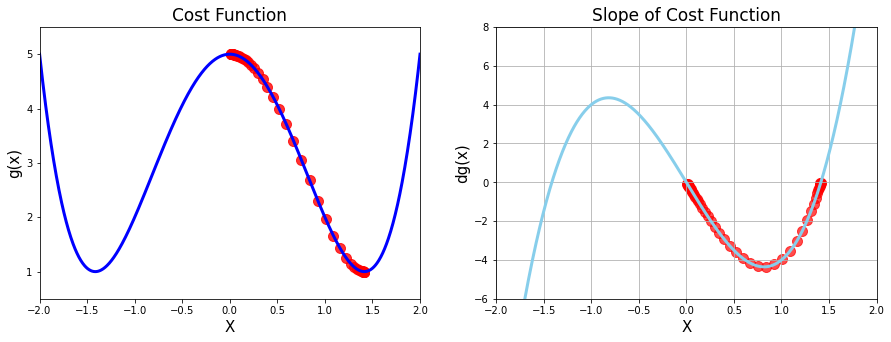

In [16]:
# Calling the gradient_descent function for Equation-2
local_min, list_x, deriv_list = gradient_function(derivative_func=dg, initial_guess=0.01)

# Plot fucnction and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1, Funtion

plt.subplot(1, 2 , 1)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('g(x)', fontsize=15)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', alpha=0.8, s=100)


# Chart 2, Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.title('Slope of Cost Function', fontsize=17)

plt.xlabel('X', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.7)


plt.show()

## Example 3 - Divergence, Overflow and Python Tuples

## $$ h(x) = x^5 - 2x^4 + 2 $$

In [17]:
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3 

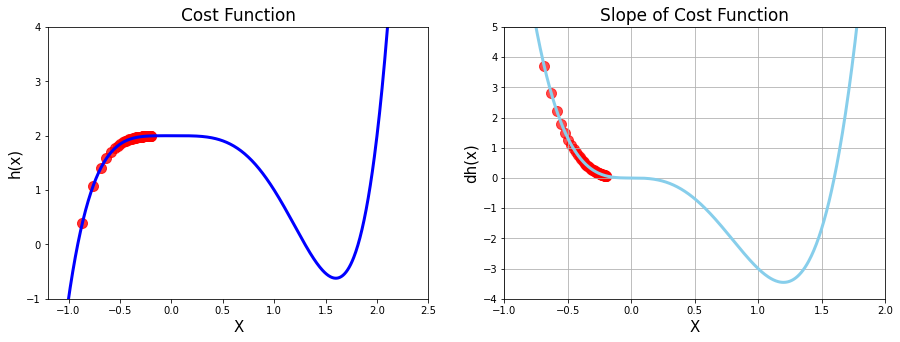

Local min occurs at : -1.8398461123332792e+24
Cost at this point : -2.1081790694225687e+121
Number of steps : 72


In [18]:
# Calling the gradient_descent function for Equation-3
local_min, list_x, deriv_list = gradient_function(derivative_func=dh, initial_guess=-0.2, max_iterations=71)

# Plot fucnction and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1, Funtion

plt.subplot(1, 2 , 1)
plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('h(x)', fontsize=15)

plt.plot(x_3, h(x_3), color='blue', linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color='red', alpha=0.8, s=100)


# Chart 2, Derivative
plt.subplot(1, 2, 2)
plt.xlim([-1, 2])
plt.ylim([-4, 5])
plt.title('Slope of Cost Function', fontsize=17)

plt.xlabel('X', fontsize=15)
plt.ylabel('dh(x)', fontsize=15)
plt.grid()

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.7)

plt.show()

print('Local min occurs at :', local_min)    # Local minimum is the point at which slope = 0
print('Cost at this point :', h(local_min))
print('Number of steps :', len(list_x))

In [19]:
import sys
sys.version
sys.float_info.max

1.7976931348623157e+308

## The Learning Rate

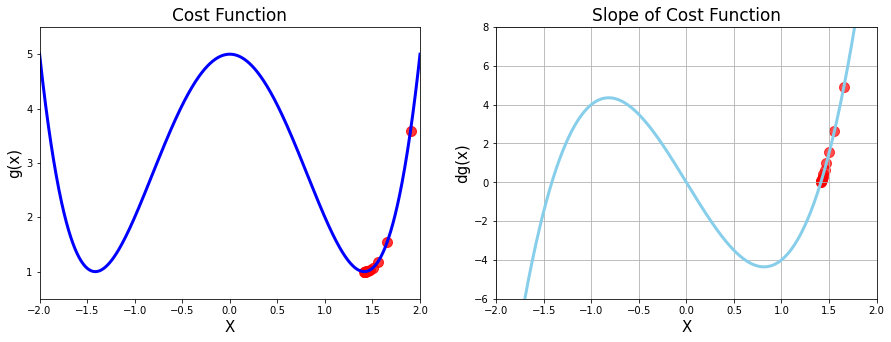

number of steps 14


In [20]:
# Calling the gradient_descent function
local_min, list_x, deriv_list = gradient_function(derivative_func=dg, initial_guess=1.9, learningRate=0.02)

# Plot fucnction and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1, Funtion

plt.subplot(1, 2 , 1)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('g(x)', fontsize=15)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', alpha=0.8, s=100)


# Chart 2, Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.title('Slope of Cost Function', fontsize=17)

plt.xlabel('X', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.7)

plt.show()

print('number of steps', len(list_x))

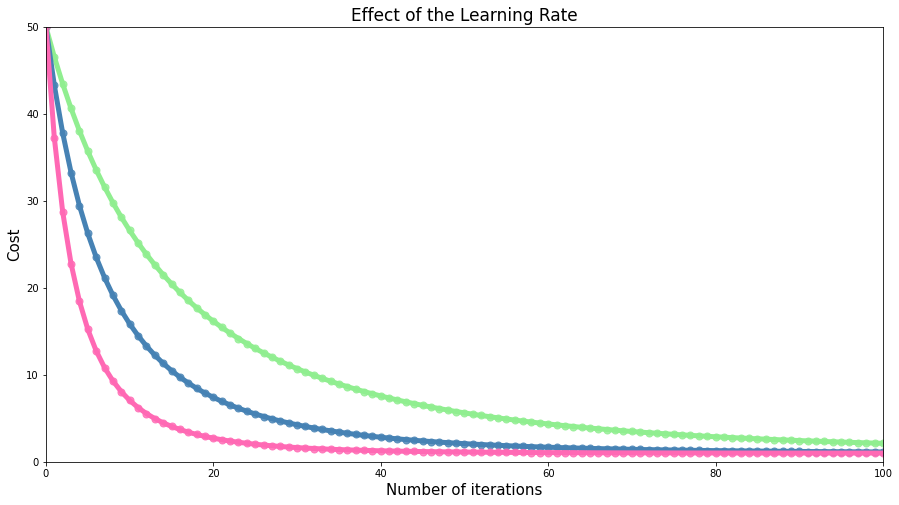

In [21]:
# Running the Gradient Descent 3 Times
n = 100

# low_gamma = local_min, list_x, deriv_list
low_gamma = gradient_function(derivative_func=dg, initial_guess=3, learningRate=0.0005,
                                                  max_iterations=n, precision=0.0001)
mid_gamma = gradient_function(derivative_func=dg, initial_guess=3, learningRate=0.001,
                                                  max_iterations=n, precision=0.0001)
high_gamma = gradient_function(derivative_func=dg, initial_guess=3, learningRate=0.002,
                                                  max_iterations=n, precision=0.0001)

# Plotting reduction is cost for each iteration

plt.figure(figsize=[15, 8])

plt.xlim([0, n])
plt.ylim([0, 50])

plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Cost', fontsize=15)

# Values for our charts
# 1) Y Axis Data: Convert the lists o numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: Create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', alpha=0.8, s=50)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', alpha=0.8, s=50)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', alpha=0.8, s=50)

plt.show()

In [22]:
# Pink line shows that when the learning rate is more, the cost is accordingly low
# But the learning rate should not exceed a certain value else it will overflow
# Always keep the learning rate to a mediocre value

# Example 4 - Data Visualisation with 3D Charts

## Minimize $$ f(x, y) = \frac{1}{3^{-x^2 - y^2}+1} $$

In [23]:
def f(x, y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [24]:
# Make our data

x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)

x_4, y_4 = np.meshgrid(x_4, y_4) # meshgrid returns a 2D Array when given a Vector

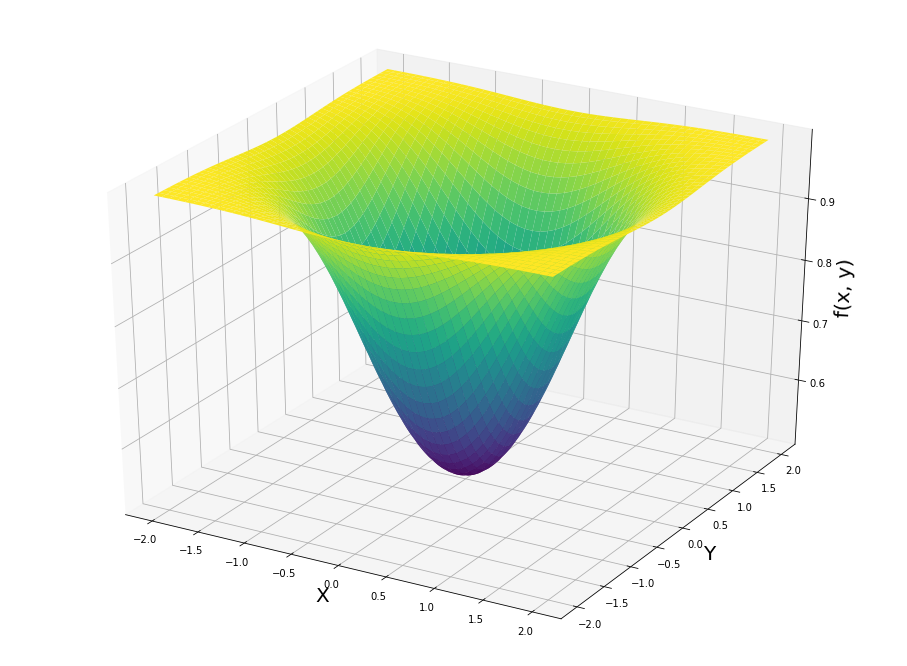

In [25]:
# Generating 3D plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')  # gca = 'get current axes'

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y)', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.viridis)  # Arguments should be 2d arrays

plt.show()

# At the bottom the 

# Partial Derivatives and Sympy

In [26]:
a, b = symbols('x, y')
print('Our Cost Function :', f(a, b))

NameError: name 'symbols' is not defined

In [27]:
print('Diff of f(x, y) wrt x :', diff(f(a, b), a))

NameError: name 'diff' is not defined

In [ ]:
print('Value of Cost Function at x=1.0 and y=1.8 :', f(a, b).evalf(subs={a:1.0, b:1.8}))

In [ ]:
# Value of slope wrt x :

print('Value of the slope wrt x at a specific x_coordinate :', diff(f(a, b), a).evalf(subs={a:1.8, b:2.0}))

# Batch Gradient Descent with Sympy

In [ ]:
# Gradient Descent Code for an equation with Two Variables using SymPy module

multiplier = 0.1
max_iter = 500
params = np.array([1.0, 0.5]) # initial guess

for _ in range(max_iter):
    
    # Value of the slope wrt X:
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    
    # Value of the slope wrt Y:
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    
    # Combining both the gradients
    gradients = np.array([gradient_x, gradient_y])
    
    # Gradient Descent Equation
    params = params - multiplier * gradients

print('Slopes at the local minimum:', gradients)
print('Local Minimum at x occurs on:', params[0])
print('Local Minimum at y occurs on:', params[1])
print('Value of Local Minimum:', f(params[0], params[1]))

In [ ]:
# Partial Derivative of f(x, y) wrt x

def fpx(x, y):
    r = 3**(-x**2-y**2)
    return (2*x*log(3)*r)/(r+1)**2

In [ ]:
# Partial Derivative of f(x, y) wrt y

def fpy(x, y):
    r = 3**(-x**2-y**2)
    return (2*y*log(3)*r)/(r+1)**2

# Gradient Descent Algorithm using Python functions

In [ ]:
# Gradient Descent Code for an equation with Two Variables without using SymPy module

# Use this method when the Differentiation of the Function is tedious

iters = 500
l_rate = 0.1
coordinates = np.array([1.0, 0.5]) # Initial Guess

for _ in range(iters):
    
    slope_at_x = fpx(coordinates[0], coordinates[1])
    slope_at_y = fpy(coordinates[0], coordinates[1])
    
    slopes = np.array([slope_at_x, slope_at_y])
    
    coordinates = coordinates - l_rate * slopes
    
print('Local Minimum at coordinates :', coordinates)
print('Slopes at local minimum :', slopes)
print('Value of x at local minimum :', coordinates[0])
print('Value of y at local minimum :', coordinates[1])
print('Value of the local minimum :', f(coordinates[0], coordinates[1]))

# Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [ ]:
# Gradient Descent Code for an equation with Two Variables without using SymPy module

# Use this method when the Differentiation of the Function is tedious

iters = 500
l_rate = 0.1
coordinates = np.array([1.0, 0.5]) # Initial Guess
values_array = coordinates.reshape(1, 2) # 1st value = no. of rows, 2nd value = no. of columns
print(values_array.shape)

# Gradient Descent Algorithm

for _ in range(iters):
    
    slope_at_x = fpx(coordinates[0], coordinates[1])
    slope_at_y = fpy(coordinates[0], coordinates[1])
    
    slopes = np.array([slope_at_x, slope_at_y])
    
    coordinates = coordinates - l_rate * slopes

# Results

print('Local Minimum at :', coordinates)
print('Slopes at local minimum :', slopes)
print('Value of x at local minimum :', coordinates[0])
print('Value of y at local minimum :', coordinates[1])
print('Value of the local minimum :', f(coordinates[0], coordinates[1]))

# Advanced Numpy Arrays Practice

In [ ]:
kirk = np.array([['Captain', 'Guitar']])
print(kirk)
print(kirk.shape)

hs_band = np.array([['a'], ['c']])
print(hs_band)
print(hs_band.shape)

In [ ]:
]